# Skillbox — Мастер-класс. Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# Домашнее задание
***

Это домашнее задание призвано укрепить ваши знания EDA. Давайте вернёмся к примеру с компанией Kiva. 

Для начала вспомним, чем занимается компания.

#  1. Kiva и её деятельность
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 

Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.


## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva выделила более одного миллиарда долларов двум миллионам заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, выделенных через Kiva, составляет $1,11 млрд
* 97,0% — доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva — женщины
* Кредит Kiva финансируется каждые две минуты

## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Набор данных от Kiva
***

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита;
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD);
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD);
- sector — сектор использования займа;
- activity — более гранулированная категория;
- use — назначение использования суммы кредита;
- country_code — ISO-код страны страны, в которой был выдан заём;
- country — полное название страны, в которой был выдан кредит;
- posted_time — время, в которое заявка была опубликована на Kiva;
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму;
- funded_time — время, когда заявка полностью финансируется кредиторами;
- term_in_months — срок, на который был выдан кредит, в месяцах;
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит;
- loaner_genders — разделённые запятыми буквы M и F, где каждый экземпляр представляет одного мужчину / одну женщину в группе.

**kiva_mpi_region_locations** — набор данных, содержащий данные о регионах и показатели MPI. Global Multidimensional Poverty Index — глобальный индекс бедности ряда регионов (субнациональных) в мире. Чем больше это значение, тем выше бедность в соответствующем регионе:
- country — страна;
- region — регион в стране;
- world_region — часть света;
- MPI — многомерный индекс бедности;
- geo — координаты (широта, долгота).




# 2. Разведочный анализ данных
***

Для выполнения работы сохраните копию на свой диск, нажав на кнопку «Файл» в верхней панели и выбрав «Сохранить копию на диск».

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

## Загрузка данных

Для удобства можно загрузить данные в колаб, предварительно их заархивировав, а затем использовать команду `!unzip kiva_loans.csv.zip`.





In [2]:
df_kiva_loans = pd.read_csv("kiva/kiva_loans.csv")
df_mpi = pd.read_csv("kiva/kiva_mpi_region_locations.csv")

_________

### Задание 1. Проверьте, что данные загрузились корректно, выведя на экран первые три строчки каждого датасета.

In [3]:
df_kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [4]:
df_mpi.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754


Отлично! Данные загружены верно. Теперь давайте посмотрим, присутствуют ли в них пропуски. 
### Задание 2. Сделайте визуализацию для проверки наличия пропусков в двух наборах данных 

Используйте метод, показанный в лонгриде:

```
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');
```



<AxesSubplot:>

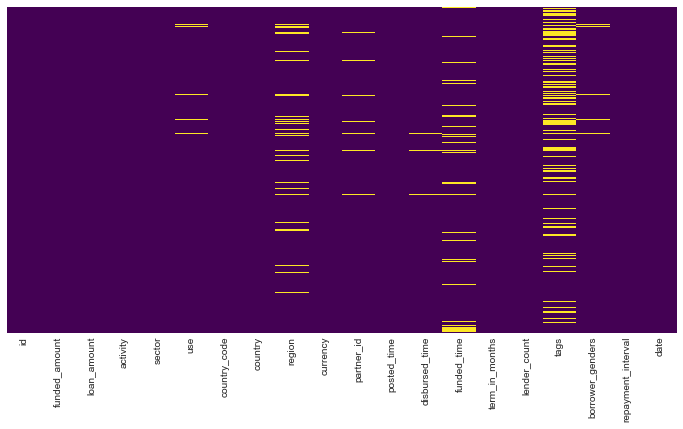

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_kiva_loans.isnull(),
            cbar=False,
            yticklabels=False,
            cmap='viridis',
            ax=ax)

<AxesSubplot:>

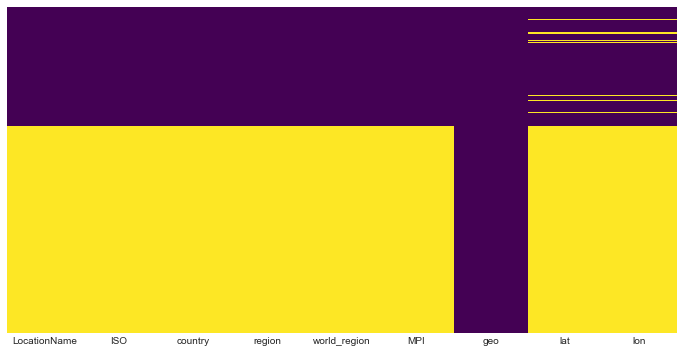

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_mpi.isnull(),
            cbar=False,
            yticklabels=False,
            cmap='viridis',
            ax=ax)

In [7]:
df_kiva_loans.isna().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [8]:
df_mpi.isna().sum()

LocationName    1788
ISO             1764
country         1764
region          1788
world_region    1764
MPI             1788
geo                0
lat             1880
lon             1880
dtype: int64

**Что мы видим?**

В некоторых колонках присутствуют пропуски. 

Помимо визуализаций, наличие пропусков можно отследить с помощью метода ```info()```. 

### Задание 3. Попробуйте применить данный метод к нашим таблицам и сравните число ненулевых значений каждого признака с количеством строк датасетов



In [9]:
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [10]:
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


Помимо числа ненулевых значений каждого столбца, мы сразу можем отследить, к какому типу данных относятся признаки.

Так как пропусков в данных немного, давайте выбросим строки, содержащие NaN.
### Задание 4. С помощью метода ```dropna``` удалите строки с пропусками из датасетов

*Подсказка: чтобы не перезаписывать данные ```(data=data.dropna())```, используйте параметр ```inplace = True```*.

In [11]:
df_kiva_loans.dropna(inplace=True)

Посчитайте количество записей в таблицах после удаления строк, содержащих NaN.

In [12]:
df_kiva_loans.isna().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          0
country               0
region                0
currency              0
partner_id            0
posted_time           0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
tags                  0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

In [13]:
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423081 entries, 2 to 671141
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  423081 non-null  int64  
 1   funded_amount       423081 non-null  float64
 2   loan_amount         423081 non-null  float64
 3   activity            423081 non-null  object 
 4   sector              423081 non-null  object 
 5   use                 423081 non-null  object 
 6   country_code        423081 non-null  object 
 7   country             423081 non-null  object 
 8   region              423081 non-null  object 
 9   currency            423081 non-null  object 
 10  partner_id          423081 non-null  float64
 11  posted_time         423081 non-null  object 
 12  disbursed_time      423081 non-null  object 
 13  funded_time         423081 non-null  object 
 14  term_in_months      423081 non-null  float64
 15  lender_count        423081 non-nul

_____________

## Пользователи Kiva

Теперь, когда мы знаем, какие типы признаков присутствуют в данных, когда все пропуски обработаны, настало время перейти к постановке гипотез и их проверке.


### Задание 1. Используя таблицу ```df_kiva_loans```, попробуйте найти связь между сроком кредита (**term_in_months**), количеством кредиторов, которые внесли свой вклад в этот кредит, (**lender_count**) и суммой займа (**loan_amount**). Какие выводы можно сделать из этих данных? 

**Для этого**:

1. Выделите три указанных столбца в отдельную таблицу `df_temp`.
2. Найдите корреляцию между признаками с помощью команды `df_temp.corr()`, сохраните полученные значения в переменную `df_corr`.
3. Используя метод `heatmap` библиотеки `seaborn`, визуализируйте полученный результат, для наглядности задайте параметры `cmap='BrBG', annot=True`.




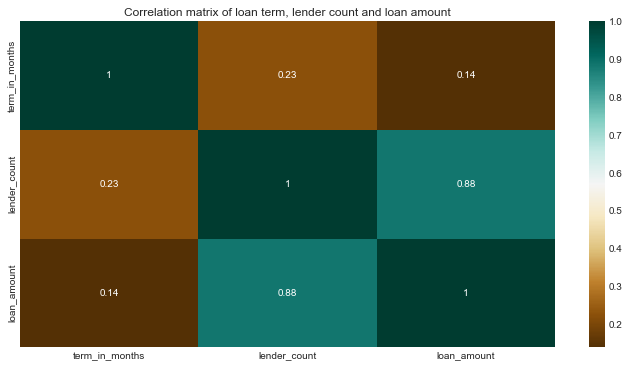

In [14]:
df_temp = df_kiva_loans[['term_in_months', 'lender_count', 'loan_amount']]
df_corr = df_temp.corr()

fig, ax = plt.subplots(figsize=(12,6))

sns.heatmap(df_corr, ax=ax, cmap='BrBG', annot=True)

ax.set_title('Correlation matrix of loan term, lender count and loan amount')

plt.show()

###Видно что срок кредита положительно коррелирует с суммой займа и количеством кредиторов, но не значительно. В то время как количество кредиторов имеет сильную положительную корреляцию с суммой займа. Что логично, так как для большей суммы займа нужно болбшее количество кредиторов, это так же говорит о том что в Kivo подавляющее количество кредиторов не вносят большие суммы.

### Задание 2. Проанализируйте разброс показателя **funded_amount** путём построения визуализации

Иcпользуйте метод `histplot` библиотеки `seaborn`.

In [15]:
funded_amount_std = df_kiva_loans.describe().loc['std', 'funded_amount']
most_funded_amounts = df_kiva_loans[df_kiva_loans['funded_amount'] < (funded_amount_std * 3)]

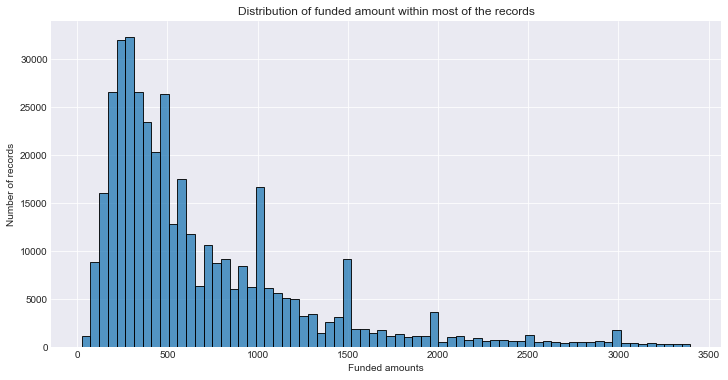

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

sns.histplot(most_funded_amounts.funded_amount, bins=70)

ax.set_title('Distribution of funded amount within most of the records')
ax.set_xlabel('Funded amounts')
ax.set_ylabel('Number of records')

plt.show()

###БОльшая часть кредитов имеет сумму до $1000, также видно что часто белутся кредиты на круглын суммы (1000, 1500, 2000 и т.д.).

### Задание 3. Изучите несколько займов с большими суммами (> 20 000). Что можно сказать о назначении этих заявок? В каких странах они оформлены? 

Подсказка: для того чтобы выделить объекты с большими суммами, можно воспользоваться командой `df_kiva_loans[df_kiva_loans.loan_amount > 20000]`.

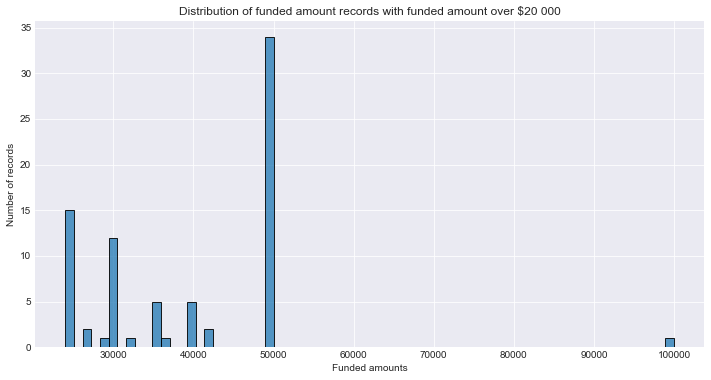

In [17]:
big_loans = df_kiva_loans[df_kiva_loans.loan_amount > 20000]

fig, ax = plt.subplots(figsize=(12,6))

sns.histplot(big_loans.funded_amount, bins=70, ax=ax)

ax.set_title('Distribution of funded amount records with funded amount over $20 000')
ax.set_xlabel('Funded amounts')
ax.set_ylabel('Number of records')

plt.show()

###На самом деле не много кредитов берется на сумму большк $20 000, но видно что самые большие суммы это $100 000, а основная часть кредитов с большими суммами приходится на $50 000, скорее всего используемые для развития более крупных проектов

____________

## Многомерный уровень бедности

### Задание 1. Найдите топ-5 регионов по среднему уровню бедности. Для этого сгруппируйте данные таблицы ```df_mpi``` по параметру **region** и найдите среднее значение **MPI** по группам

*Подсказка: для сортировки данных типа ```Series`` от большего значения к меньшему` , используйте метод ```sort_values``` с параметром `ascending = False`*.

In [18]:
df_mpi['world_region'].fillna('Other', inplace=True)
df_mpi.world_region.unique()

array(['South Asia', 'Europe and Central Asia', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'East Asia and the Pacific',
       'Arab States', 'Other'], dtype=object)

In [19]:
df_kiva_loans.reset_index(drop=True, inplace=True)
df_kiva_loans['world_region'] = ''

for i in range(df_kiva_loans.shape[0]):
    try:
        world_region = df_mpi.loc[df_mpi['country'] == df_kiva_loans.iloc[i, :]['country']].head(1).world_region.item()
    except:
        world_region = 'Other'

    df_kiva_loans.at[i, 'world_region'] = world_region

df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,world_region
0,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,South Asia
1,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01,South Asia
2,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,South Asia
3,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01,South Asia
4,653089,400.0,400.0,General Store,Retail,"to buy stock of rice, sugar and flour .",PK,Pakistan,Faisalabad,PKR,...,2014-01-01 12:04:57+00:00,2013-12-24 08:00:00+00:00,2014-01-08 00:35:14+00:00,14.0,16,"#Repeat Borrower, #Woman Owned Biz",female,monthly,2014-01-01,South Asia


In [20]:
poorest_regions = df_mpi.groupby('world_region').mean().nlargest(5, 'MPI').reset_index()
poorest_regions

,world_region,MPI,lat,lon
0,Sub-Saharan Africa,0.337128,1.563445,14.800826
1,South Asia,0.219630,28.316798,69.152419
2,East Asia and the Pacific,0.136266,9.467531,94.591941
3,Arab States,0.115287,23.391848,28.979632
4,Latin America and Caribbean,0.063665,7.197399,-61.431764


In [21]:
loans_regions = df_kiva_loans.groupby('world_region').count().reset_index().sort_values('id', ascending=False)
loans_regions = loans_regions[loans_regions['world_region'] != 'Other']
loans_regions

,world_region,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,...,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
1,East Asia and the Pacific,125401,125401,125401,125401,125401,125401,125401,125401,125401,...,125401,125401,125401,125401,125401,125401,125401,125401,125401,125401
6,Sub-Saharan Africa,98397,98397,98397,98397,98397,98397,98397,98397,98397,...,98397,98397,98397,98397,98397,98397,98397,98397,98397,98397
3,Latin America and Caribbean,79696,79696,79696,79696,79696,79696,79696,79696,79696,...,79696,79696,79696,79696,79696,79696,79696,79696,79696,79696
2,Europe and Central Asia,30286,30286,30286,30286,30286,30286,30286,30286,30286,...,30286,30286,30286,30286,30286,30286,30286,30286,30286,30286
5,South Asia,28378,28378,28378,28378,28378,28378,28378,28378,28378,...,28378,28378,28378,28378,28378,28378,28378,28378,28378,28378
0,Arab States,6315,6315,6315,6315,6315,6315,6315,6315,6315,...,6315,6315,6315,6315,6315,6315,6315,6315,6315,6315


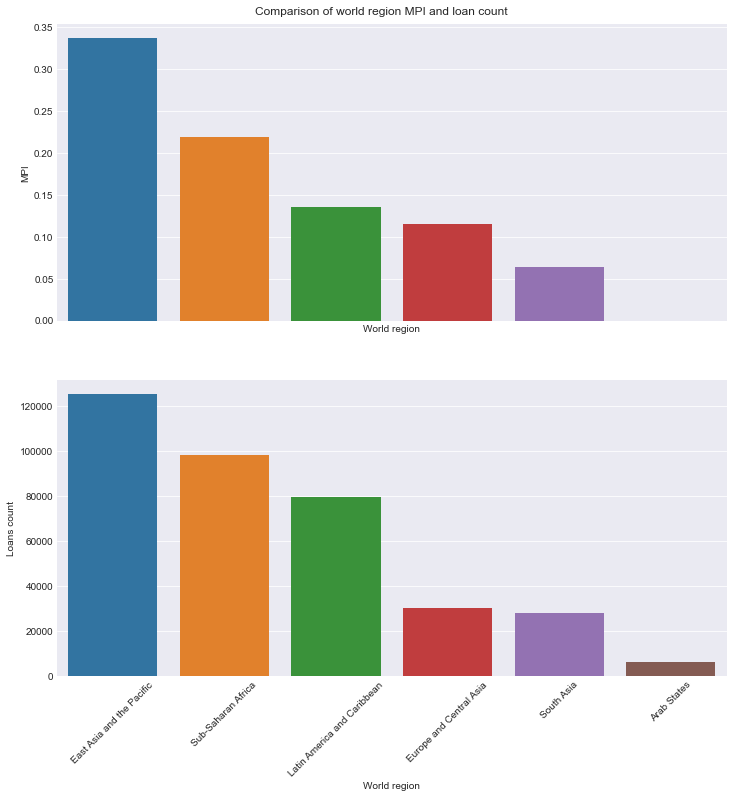

In [22]:
n_rows = 2

fig, axs = plt.subplots(nrows=n_rows, ncols=1, figsize=(12,12), sharex=True)

fig.suptitle('Comparison of world region MPI and loan count', y=0.9)

for i in range(n_rows):
    ax = axs[i]

    if i == 0:
        sns.barplot(data=poorest_regions, x='world_region', y='MPI', ax=ax)
        ax.set_ylabel('MPI')
    else:
        sns.barplot(data=loans_regions, x='world_region', y='id', ax=ax)
        ax.set_ylabel('Loans count')

    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('World region')

plt.show()

###Столбец region, мне ни о чем не говорит, поэто му я использовал world_region и сравнил MPI с количеством кредитов. Очевидна сильная зависимость количества займов от бедности региона.

### Задание 2. Постройте диаграму показателя **MPI** (многомерный индекс бедности) в разных странах

In [24]:
countries_mpi = df_mpi.groupby('country').mean().nlargest(40, 'MPI').reset_index()

In [25]:
countries_mpi['world_region'] = ''

for i in range(countries_mpi.shape[0]):
    record = countries_mpi.iloc[i, :]
    countries_mpi.at[i, 'world_region'] = df_mpi[df_mpi['country'] == record['country']].head(1)['world_region'].item()

countries_mpi

,country,MPI,lat,lon,world_region
0,Chad,0.582905,10.197954,18.000479,Sub-Saharan Africa
1,South Sudan,0.549778,7.115700,29.579105,Sub-Saharan Africa
2,Burkina Faso,0.547692,11.701106,-0.894327,Sub-Saharan Africa
3,Niger,0.543375,14.665138,-3.133998,Sub-Saharan Africa
4,Ethiopia,0.492273,9.525862,39.235947,Sub-Saharan Africa
5,Sierra Leone,0.481071,10.498965,-11.291153,Sub-Saharan Africa
6,Guinea,0.479875,10.097655,-11.717144,Sub-Saharan Africa
7,Central African Republic,0.453500,6.943445,18.198751,Sub-Saharan Africa
8,Mali,0.444833,13.337528,-7.356431,Sub-Saharan Africa
9,Liberia,0.433867,8.276008,-7.112259,Sub-Saharan Africa


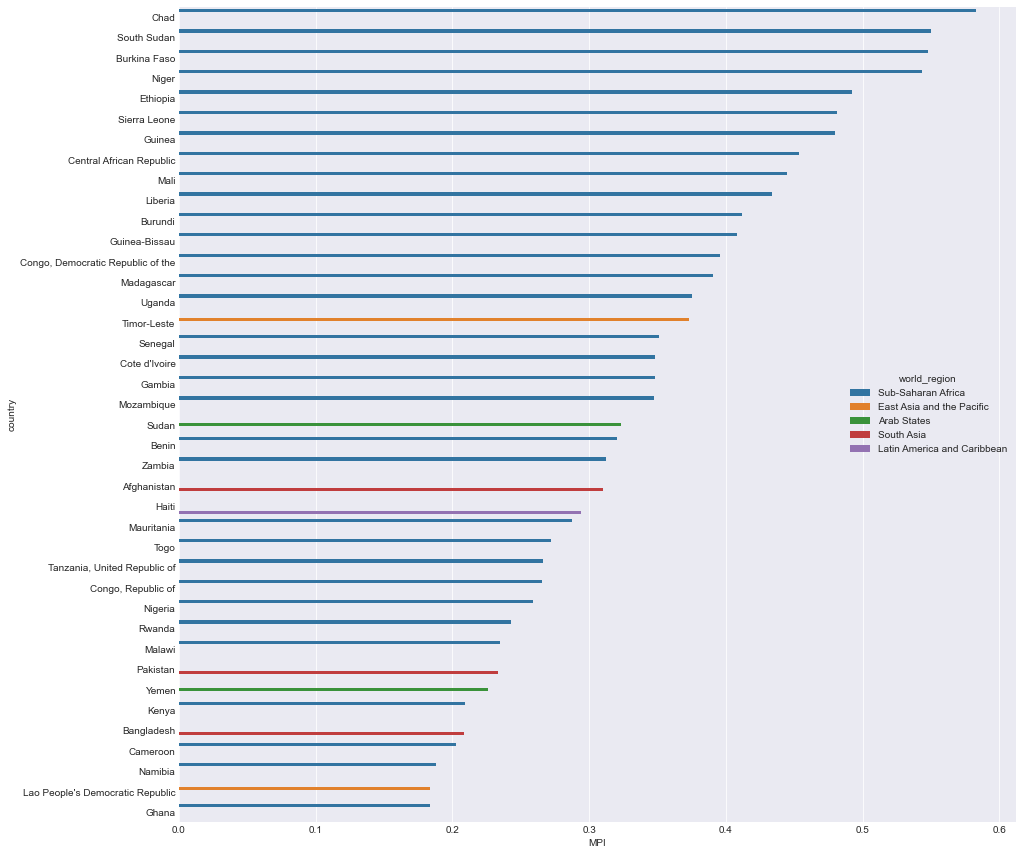

In [26]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.barplot(data=countries_mpi, x='MPI', y='country', hue='world_region', ax=ax)

plt.show()

### Видно что большинство самых бедных стран находятся в Африке.